C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


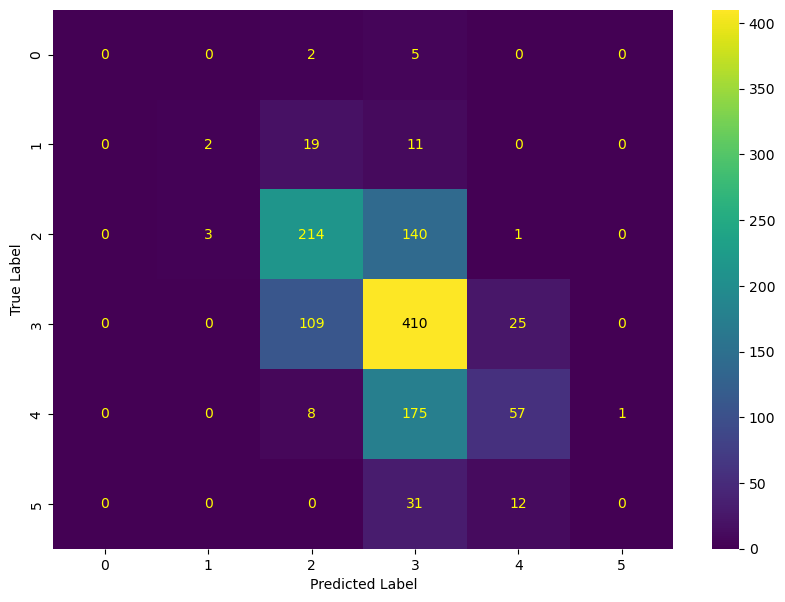

(0.5643893306641458,
 '              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         7\n           4       0.40      0.06      0.11        32\n           5       0.61      0.60      0.60       358\n           6       0.53      0.75      0.62       544\n           7       0.60      0.24      0.34       241\n           8       0.00      0.00      0.00        43\n\n    accuracy                           0.56      1225\n   macro avg       0.36      0.28      0.28      1225\nweighted avg       0.54      0.56      0.52      1225\n')

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Carregar os dados
file_path = 'winequality-white.csv'
data = pd.read_csv(file_path, sep=';')

# Separar os dados em features (X) e target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Treinar o modelo SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Avaliar o modelo com validação cruzada no conjunto de treino
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# Previsões e avaliação no conjunto de teste
y_pred = svm_model.predict(X_test)
classification_report_test = classification_report(y_test, y_pred)
confusion_matrix_test = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='viridis', annot_kws={"color":'black'})

# Obter o objeto de eixo atual
ax = plt.gca()

# Loop sobre as células de texto
for text in ax.texts:
    # Obter o valor da célula
    value = int(text.get_text())
    # Se o valor for menor que um certo limite, defina a cor do texto como amarelo
    if value < 300:  # Substitua 50 pelo limite desejado
        text.set_color('yellow')
    # Se o valor for maior que um certo limite, defina a cor do texto como preto
    else:
        text.set_color('black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('')
plt.show()

cv_scores.mean(), classification_report_test

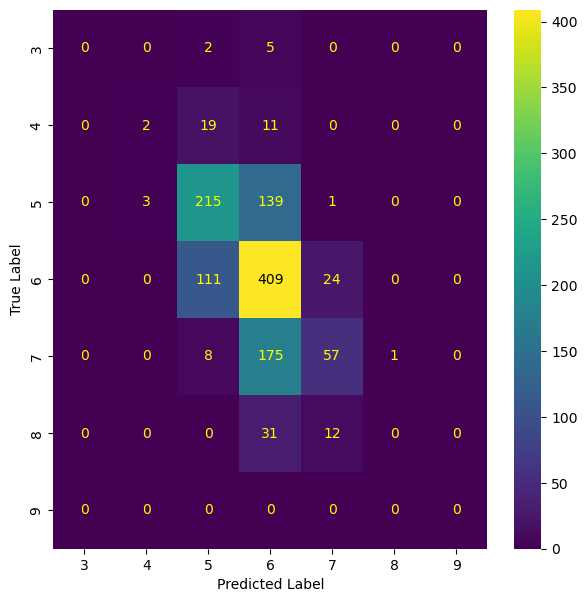

Acurácias da Validação Cruzada (5 Folds): [0.56734694 0.5537415  0.55918367 0.57493188 0.57084469]
Média da Acurácia: 0.5652097351202061


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

# Carregar os dados do arquivo CSV
file_path = 'winequality-white.csv'  # Substitua com o caminho correto do arquivo
data = pd.read_csv(file_path, sep=';')

# Divisão dos dados em treino e teste
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

# Separando as características e a variável alvo para treino e teste
X_train = train_data.drop('quality', axis=1)
y_train = train_data['quality']
X_test = test_data.drop('quality', axis=1)
y_test = test_data['quality']

# Validando o modelo com validação cruzada
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=cv, scoring='accuracy')

# Treinando o modelo no conjunto de treino completo
svm_model.fit(X_train, y_train)

# Avaliando o modelo no conjunto de teste
y_pred = svm_model.predict(X_test)
class_labels = np.unique(data['quality'])
confusion_mat = confusion_matrix(y_test, y_pred, labels=class_labels)

# Plotar a matriz de confusão personalizada
plt.figure(figsize=(7, 7))
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='viridis', annot_kws={"color":'black'}, xticklabels=class_labels, yticklabels=class_labels)

# Obter o objeto de eixo atual
ax = plt.gca()

# Loop sobre as células de texto
for text in ax.texts:
    value = int(text.get_text())
    if value < 300:
        text.set_color('yellow')
    else:
        text.set_color('black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('')
plt.show()

# Exibindo os resultados da validação cruzada
print("Acurácias da Validação Cruzada (5 Folds):", cross_val_scores)
print("Média da Acurácia:", np.mean(cross_val_scores))


C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


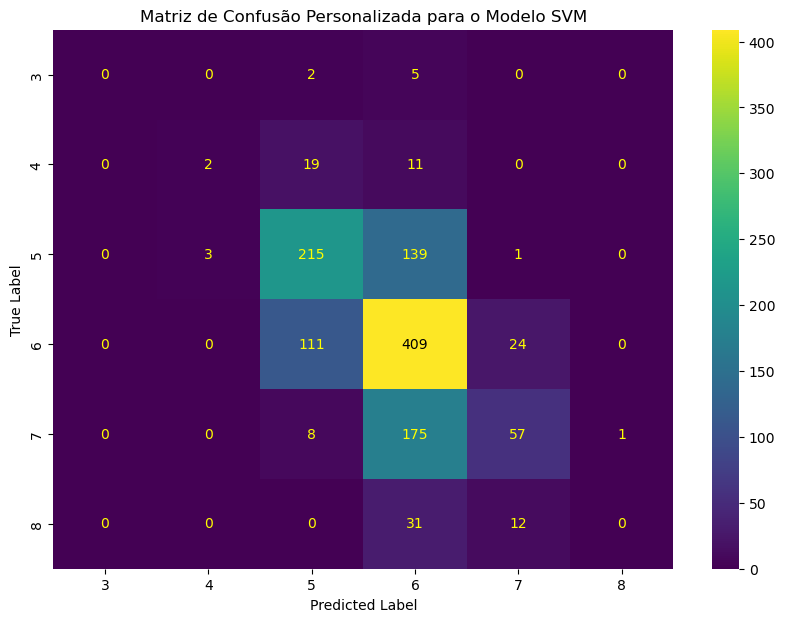

Acurácias da Validação Cruzada (5 Folds): [0.56734694 0.5537415  0.55918367 0.57493188 0.57084469]
Média da Acurácia: 0.5652097351202061

Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.40      0.06      0.11        32
           5       0.61      0.60      0.60       358
           6       0.53      0.75      0.62       544
           7       0.61      0.24      0.34       241
           8       0.00      0.00      0.00        43

    accuracy                           0.56      1225
   macro avg       0.36      0.28      0.28      1225
weighted avg       0.54      0.56      0.52      1225



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

# Carregar os dados do arquivo CSV
file_path = 'winequality-white.csv'  # Substitua com o caminho correto do arquivo
data = pd.read_csv(file_path, sep=';')

# Divisão dos dados em treino e teste
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

# Separando as características e a variável alvo para treino e teste
X_train = train_data.drop('quality', axis=1)
y_train = train_data['quality']
X_test = test_data.drop('quality', axis=1)
y_test = test_data['quality']

# Validando o modelo com validação cruzada
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=cv, scoring='accuracy')

# Treinando o modelo no conjunto de treino completo
svm_model.fit(X_train, y_train)

# Avaliando o modelo no conjunto de teste
y_pred = svm_model.predict(X_test)
class_labels = np.unique(y_test)
confusion_mat = confusion_matrix(y_test, y_pred, labels=class_labels)

# Relatório de classificação
classification_rep = classification_report(y_test, y_pred, target_names=class_labels.astype(str))

# Plotar a matriz de confusão personalizada
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='viridis', annot_kws={"color":'black'}, xticklabels=class_labels, yticklabels=class_labels)

# Obter o objeto de eixo atual
ax = plt.gca()

# Loop sobre as células de texto
for text in ax.texts:
    value = int(text.get_text())
    if value < 300:
        text.set_color('yellow')
    else:
        text.set_color('black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusão Personalizada para o Modelo SVM')
plt.show()

# Exibindo os resultados da validação cruzada
print("Acurácias da Validação Cruzada (5 Folds):", cross_val_scores)
print("Média da Acurácia:", np.mean(cross_val_scores))

# Exibindo o relatório de classificação
print("\nRelatório de Classificação:\n", classification_rep)


In [4]:
from sklearn.metrics import recall_score

# Cálculo da média de acurácia
accuracy_mean = np.mean(cross_val_scores)

# Cálculo da média de recall
recall_mean = recall_score(y_test, y_pred, average='macro')

# Exibindo as médias
print("Média da Acurácia (Validação Cruzada):", accuracy_mean)
print("Média de Recall (Teste):", recall_mean)

Média da Acurácia (Validação Cruzada): 0.5652097351202061
Média de Recall (Teste): 0.2752352362222619
